In [1]:
from sys import platform
import sys, os
# identification de la base de prix utilisée : directory principal
# sur ubuntu

path=''
if platform == 'linux' :
    path ='/home/olivier/1-NeuralPricing/AutoCallYetiPhoenix/'
# sur. mac osx
if platform == 'darwin' :
    path ='/Users/olivier/keras/NeuralPricing/AutoCallYetiPhoenix/'
import keras,tensorflow,pkg_resources
datafile='Data/Learningbase1.CSV'
#datafile='Data/Baby_Learningbase1.CSV'
os.chdir(path)
# le package identifie la methode de calibration : sous-directory

/Users/olivier/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pip; print("pip ",pip.__version__)
print(os.environ['HOME'])
print(sys.executable)
dists = [d for d in pkg_resources.working_set]
import keras
print("keras ",keras.__version__)
import tensorflow as tf
print("tensorflow ",tf.__version__)

pip  18.1
/Users/olivier
/Users/olivier/anaconda3/bin/python
keras  2.2.4
tensorflow  1.10.1


In [21]:
len(resultats)

5

In [5]:
from math import sqrt, exp, log, erf,floor
import numpy 
import pandas
from decimal import *
import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from keras import callbacks
from keras.layers import Activation
from keras.layers import Lambda
from keras.models import Sequential
from keras.models import model_from_json
import matplotlib
import matplotlib.pyplot as pyplot
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import mpl_toolkits
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sklearn import preprocessing
from sklearn import model_selection

import joblib
import seaborn as sns
import scipy
from IPython.display import display
import time
import tensorflow as tf
%matplotlib inline
getcontext().prec = 8

from IPython.display import display
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual,FloatProgress
import ipywidgets as widgets
import time

getcontext().prec = 8

from util_functions_yetiPhoenix_11Layers_Next import *

In [7]:
def SelectBestLayer(resultats,k,NbLayers,epsilon):    # epsilon greedy strategy
   
    res =  [[resultats[l][1],resultats[l][2]-resultats[l][0],0] for l in range(len(resultats))]  
    randomchance = random.random()
    if (randomchance<epsilon) :
        i=random.randint(0, NbLayers-1)
    else :
        resmax = res[0][1]
        res[0][2] = 1
        for l in range(len(resultats)):
           
            if (res[l][1] > resmax) :
                res[l][2] = res[l][0] 
                resmax = res[l][1]
            else :
                res[l][2] = res[l-1][2]
        i = res[len(resultats)-1][2]
    return i

In [8]:
resultats=[[0.1,0,0.1],[0.1,1,0.12],[0.12,3,0.14],[0.14,2,0.18],[0.18,2,0.19]]
k=4
NbLayers=11
epsilon=0.2
print(SelectBestLayer(resultats,k,NbLayers,epsilon))

2


In [9]:
params=metaparameters()

params.INPUT_DIM  = 23
params.INPUT_GOAL = 24
params.NB_NEURON_PRINCIPAL =8
params.ACTIVATION_PRINCIPALE = 'tanh'
params.ACTIVATION_PRINCIPALE_FINALE = 'linear'
params.INITIAL_LEARNING_NB_EPOCH=5
params.LEARNINGBASE_ORIGIN="Learningbase1_4XNeuron_15000-11Layers"
params.LEARNINGBASE_BUT="Learningbase1_4XNeuron_15000-11Layers-Next"
params.ADDITIONAL_LEARNING_NB_EPOCH = 5
params.BATCH_SIZE_PRINCIPAL = 32768
params.OPTIMIZER='adamax'
params.NBLAYERS = 11
params.PATH = path
params.VERBOSE_FLAG=2

In [10]:
dataframe = pandas.read_csv(datafile, sep=",",decimal=".",header=None)
dataset = dataframe.values
X = dataset[1:,1:params.INPUT_DIM+1]
datasize=dataset[1:,params.INPUT_DIM].size
X_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X_scaled = (X_scaler.fit_transform(X))
Ycall_Option = dataset[1:,params.INPUT_GOAL]
params.X_scaler = X_scaler
params.X_scaled = X_scaled
params.X = X

os.chdir(path)
pkgPath=path + params.LEARNINGBASE_ORIGIN
if not(os.path.isdir(pkgPath)):
    os.makedirs(pkgPath,0o777 )
params.pkgPath = pkgPath

# Rechargement du modele

In [11]:
learnedModels=reloadAllModels(X,path + "/" + params.LEARNINGBASE_ORIGIN)
model_origine,DataScalerX,DataScalerY,X_scaler,X_scaled,y_scaler_Option,y_scaled_Option,Y_ordre1_Option=learnedModels
filename = pkgPath + '/' + "Option" +'scaledY.pkl'
if (len(y_scaled_Option)==0):
        y_scaled_Option = y_scaler_Option.transform(Ycall_Option.reshape(-1, 1)).reshape(1, -1)[0]

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breakin

In [7]:
y_scaled_Option2 = y_scaler_Option.transform(Ycall_Option.reshape(-1, 1)).reshape(1, -1)[0]

In [8]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(params.X_scaled, y_scaled_Option2, test_size=0.10, random_state=3)
pkgName = params.LEARNINGBASE_ORIGIN; cnfigName="Option";pkgName2Initial=params.LEARNINGBASE_BUT;NbLayers=11;k=0;i=0

In [9]:
pkgPath=params.PATH + "/" + pkgName   
json_file = open(pkgPath + '/' + cnfigName +'.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
pkgName2=pkgName2Initial+"-loop-"+str(k)
deltaNbNeuronList = BulleListPar(i,NbLayers)
pkgPath2=params.PATH + "/" + pkgName2
os.chdir(params.PATH)
if not(os.path.isdir(pkgPath2)):
    os.makedirs(pkgPath2,0o777 )
model = model_from_json(loaded_model_json)              ### chargment du model initial (1)
model.load_weights(pkgPath + '/' + cnfigName +'.hdf5')  ### chargment du model initial (2)

In [10]:
noteinitiale =Compute_Note(model,['Data/Notation1.CSV'],params,y_scaler_Option)

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 0.191794792602788


In [12]:
opt=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

In [13]:
model.compile(loss='mse', optimizer=opt, metrics=["accuracy"])
model.evaluate(X_train, y_train, batch_size=params.BATCH_SIZE_PRINCIPAL,verbose=params.VERBOSE_FLAG)

[1.0615030708330177e-07, 1.1111123456803841e-06]

In [14]:
model.compile(loss='mse', optimizer=params.OPTIMIZER, metrics=["accuracy"])
model.evaluate(X_train, y_train, batch_size=params.BATCH_SIZE_PRINCIPAL,verbose=params.VERBOSE_FLAG)

[1.0615030708330177e-07, 1.1111123456803841e-06]

In [15]:
weights1=model.get_weights();shape_list = list(map(lambda k: k.shape ,weights1));initial_NbNeuron = shape_list[0][0]
layer_NbNeuron = [shape_list[2*k][1] for k in range(9)];layer_NbNeuron.append(1);inData=Input(shape=(params.INPUT_DIM,))
layer0 = Dense(layer_NbNeuron[0]+deltaNbNeuronList[0],\
               activation=params.ACTIVATION_PRINCIPALE,name='Layer0')(inData)
layer1 = Dense(layer_NbNeuron[1]+deltaNbNeuronList[1],activation=params.ACTIVATION_PRINCIPALE,name='Layer1')(layer0)
layer2 = Dense(layer_NbNeuron[2]+deltaNbNeuronList[2],activation=params.ACTIVATION_PRINCIPALE,name='Layer2')(layer1)
layer3 = Dense(layer_NbNeuron[3]+deltaNbNeuronList[3],activation=params.ACTIVATION_PRINCIPALE,name='Layer3')(layer2)
layer4 = Dense(layer_NbNeuron[4]+deltaNbNeuronList[4],activation=params.ACTIVATION_PRINCIPALE,name='Layer4')(layer3)
layer5 = Dense(layer_NbNeuron[5]+deltaNbNeuronList[5],activation=params.ACTIVATION_PRINCIPALE,name='Layer5')(layer4)
layer6 = Dense(layer_NbNeuron[6]+deltaNbNeuronList[6],activation=params.ACTIVATION_PRINCIPALE,name='Layer6')(layer5)
layer7 = Dense(layer_NbNeuron[7]+deltaNbNeuronList[7],activation=params.ACTIVATION_PRINCIPALE,name='Layer7')(layer6)
layer8 = Dense(layer_NbNeuron[8]+deltaNbNeuronList[8],activation=params.ACTIVATION_PRINCIPALE,name='Layer8')(layer7)
prixfinal = Dense(1,activation=params.ACTIVATION_PRINCIPALE_FINALE)(layer8);model2 = Model(inputs = inData, outputs = prixfinal)

In [16]:
opt=keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)
model2.compile(loss='mse', optimizer=opt, metrics=["accuracy"])
weights1[0] =np.transpose(np.concatenate((np.transpose(weights1[0]),numpy.zeros((deltaNbNeuronList[0],initial_NbNeuron)))))
weights1[1] =np.concatenate((weights1[1],numpy.zeros(deltaNbNeuronList[0])))
weights1[2] =np.concatenate((weights1[2],numpy.zeros((deltaNbNeuronList[0],layer_NbNeuron[1]))))
for nlayer in range(1,9):
    weights1[2*nlayer] =np.transpose(np.concatenate((np.transpose(weights1[2*nlayer]),numpy.zeros((deltaNbNeuronList[nlayer],layer_NbNeuron[nlayer-1]+deltaNbNeuronList[nlayer-1])))))
    weights1[2*nlayer+1] =np.concatenate((weights1[2*nlayer+1],numpy.zeros(deltaNbNeuronList[nlayer])))
    weights1[2*nlayer+2] =np.concatenate((weights1[2*nlayer+2],numpy.zeros((deltaNbNeuronList[nlayer],layer_NbNeuron[nlayer+1]))))
model2.set_weights(weights1)

In [17]:
model2.evaluate(X_train, y_train, batch_size=params.BATCH_SIZE_PRINCIPAL,verbose=params.VERBOSE_FLAG)

[1.0615030708330177e-07, 1.1111123456803841e-06]

In [32]:
checkpointer = keras.callbacks.ModelCheckpoint(filepath = "BestWeights.hdf5",verbose=1,save_best_only=True , monitor = 'loss')
numpy.random.seed(3)
model2.fit(X_train, y_train, epochs=100, batch_size=params.BATCH_SIZE_PRINCIPAL,verbose=params.VERBOSE_FLAG, shuffle = True, callbacks=[checkpointer])

Epoch 1/100
 - 73s - loss: 1.0514e-07 - acc: 1.1111e-06

Epoch 00001: loss improved from inf to 0.00000, saving model to BestWeights.hdf5
Epoch 2/100
 - 74s - loss: 1.0511e-07 - acc: 1.1111e-06

Epoch 00002: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 3/100
 - 74s - loss: 1.0508e-07 - acc: 1.1111e-06

Epoch 00003: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 4/100
 - 75s - loss: 1.0505e-07 - acc: 1.1111e-06

Epoch 00004: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 5/100
 - 75s - loss: 1.0502e-07 - acc: 1.1111e-06

Epoch 00005: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 6/100
 - 75s - loss: 1.0499e-07 - acc: 1.1111e-06

Epoch 00006: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 7/100
 - 75s - loss: 1.0496e-07 - acc: 1.1111e-06

Epoch 00007: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 8/10


Epoch 00058: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 59/100
 - 77s - loss: 1.0424e-07 - acc: 1.1111e-06

Epoch 00059: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 60/100
 - 77s - loss: 1.0424e-07 - acc: 1.1111e-06

Epoch 00060: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 61/100
 - 77s - loss: 1.0423e-07 - acc: 1.1111e-06

Epoch 00061: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 62/100
 - 76s - loss: 1.0422e-07 - acc: 1.1111e-06

Epoch 00062: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 63/100
 - 77s - loss: 1.0422e-07 - acc: 1.1111e-06

Epoch 00063: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 64/100
 - 77s - loss: 1.0421e-07 - acc: 1.1111e-06

Epoch 00064: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 65/100
 - 77s - loss: 1.0420e-07 - acc: 1.1111e-06

In [30]:
model2.evaluate(X_train, y_train, batch_size=params.BATCH_SIZE_PRINCIPAL,verbose=params.VERBOSE_FLAG)

[1.0515683911167663e-07, 1.1111123456803841e-06]

In [27]:
model2.evaluate(X_train, y_train, batch_size=params.BATCH_SIZE_PRINCIPAL,verbose=params.VERBOSE_FLAG)

[1.055728498019347e-07, 1.1111123456803841e-06]

In [31]:
noteinitiale =Compute_Note(model2,['Data/Notation1.CSV'],params,y_scaler_Option)

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 0.19165294343434758


In [28]:
noteinitiale =Compute_Note(model2,['Data/Notation1.CSV'],params,y_scaler_Option)

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 0.19175817339824175


In [ ]:
from keras.models import load_model
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

# Reprise du learning avec evolution genetique

In [ ]:
y_scaled_Option = y_scaler_Option.transform(Ycall_Option.reshape(-1, 1)).reshape(1, -1)[0]
Y_ordre1_Option,model_evolution,y_scaler_Option,y_scaled_Option=ReinforceOptimality(\
    params.LEARNINGBASE_ORIGIN,params.LEARNINGBASE_BUT,params.NBLAYERS,Ycall_Option,y_scaler_Option,y_scaled_Option,\
    "Option",params,generate_errors = False)


/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 0.20045303506725398
noteinitiale= 0.20045303506725398
New model synthesized
starting fit
Epoch 1/5
 - 82s - loss: 9.3061e-05 - acc: 1.1111e-06

Epoch 00001: loss improved from inf to 0.00009, saving model to BestWeights.hdf5
Epoch 2/5
 - 77s - loss: 1.4990e-05 - acc: 1.1111e-06

Epoch 00002: loss improved from 0.00009 to 0.00001, saving model to BestWeights.hdf5
Epoch 3/5
 - 74s - loss: 4.4362e-06 - acc: 1.1111e-06

Epoch 00003: loss improved from 0.00001 to 0.00000, saving model to BestWeights.hdf5
Epoch 4/5
 - 74s - loss: 2.3826e-06 - acc: 1.1111e-06

Epoch 00004: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 5/5
 - 74s - loss: 1.6527e-06 - acc: 1.1111e-06

Epoch 00005: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
temps de calibration  382.8091371059418
starting to save
Saved model to disk as Option
number of additional learning : 1


/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 0.40205241582780976
notefinale= 0.40205241582780976


/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 0.40205241582780976
noteinitiale= 0.40205241582780976
New model synthesized
starting fit
Epoch 1/5
 - 75s - loss: 1.4770e-04 - acc: 1.1111e-06

Epoch 00001: loss improved from inf to 0.00015, saving model to BestWeights.hdf5
Epoch 2/5
 - 74s - loss: 5.0608e-05 - acc: 1.1111e-06

Epoch 00002: loss improved from 0.00015 to 0.00005, saving model to BestWeights.hdf5
Epoch 3/5
 - 74s - loss: 2.8562e-05 - acc: 1.1111e-06

Epoch 00003: loss improved from 0.00005 to 0.00003, saving model to BestWeights.hdf5
Epoch 4/5
 - 75s - loss: 2.0786e-05 - acc: 1.1111e-06

Epoch 00004: loss improved from 0.00003 to 0.00002, saving model to BestWeights.hdf5
Epoch 5/5
 - 74s - loss: 1.5571e-05 - acc: 1.1111e-06

Epoch 00005: loss improved from 0.00002 to 0.00002, saving model to BestWeights.hdf5
temps de calibration  373.75458884239197
starting to save
Saved model to disk as Option
number of additional learning : 2


/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 1.164025167662371
notefinale= 1.164025167662371


/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Note = 1.164025167662371
noteinitiale= 1.164025167662371
New model synthesized
starting fit
Epoch 1/5
 - 75s - loss: 1.9345e-04 - acc: 1.1111e-06

Epoch 00001: loss improved from inf to 0.00019, saving model to BestWeights.hdf5


# Rechargement prealable au learning additionnel

In [29]:
learnedModels=reloadAllModels(X,path + "/" + params.LEARNINGBASE_BUT)
model_improved,DataScalerX,DataScalerY,X_scaler,X_scaled,y_scaler_Option,y_scaled_Option,Y_ordre1_Option=learnedModels
filename = pkgPath + '/' + "Option" +'scaledY.pkl'
if (len(y_scaled_Option)==0):
        y_scaled_Option = y_scaler_Option.transform(Ycall_Option.reshape(-1, 1)).reshape(1, -1)[0]

# Learning additionel

In [30]:
params.ADDITIONAL_LEARNING_NB_EPOCH = 1000
startCalibrationTime = time.time()
Y_ordre1_Option,enhanced_model,y_scaler_Option,y_scaled_Option=CalibrationRestartFromPkg(\
    params.LEARNINGBASE_BUT,Ycall_Option,y_scaler_Option,y_scaled_Option,"Option",params,generate_errors = False)
endCalibrationTime = time.time()
print('temps de calibration additionnelle Numero'+str(params.NB_ADDITIONAL_LEARNING),endCalibrationTime - startCalibrationTime)
startNoteTime = time.time()

Epoch 1/1000
 - 4s - loss: 4.7137e-06 - acc: 2.2222e-06

Epoch 00001: loss improved from inf to 0.00000, saving model to BestWeights.hdf5
Epoch 2/1000
 - 2s - loss: 3.1098e-07 - acc: 2.2222e-06

Epoch 00002: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 3/1000
 - 2s - loss: 6.6265e-08 - acc: 2.2222e-06

Epoch 00003: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 4/1000
 - 2s - loss: 4.9098e-08 - acc: 2.2222e-06

Epoch 00004: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 5/1000
 - 2s - loss: 4.7488e-08 - acc: 2.2222e-06

Epoch 00005: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 6/1000
 - 2s - loss: 4.7279e-08 - acc: 2.2222e-06

Epoch 00006: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 7/1000
 - 2s - loss: 4.7110e-08 - acc: 2.2222e-06

Epoch 00007: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 8/10


Epoch 00076: loss did not improve from 0.00000
Epoch 77/1000
 - 2s - loss: 8.3342e-08 - acc: 2.2222e-06

Epoch 00077: loss did not improve from 0.00000
Epoch 78/1000
 - 2s - loss: 2.4709e-07 - acc: 2.2222e-06

Epoch 00078: loss did not improve from 0.00000
Epoch 79/1000
 - 2s - loss: 1.9154e-07 - acc: 2.2222e-06

Epoch 00079: loss did not improve from 0.00000
Epoch 80/1000
 - 2s - loss: 2.8095e-07 - acc: 2.2222e-06

Epoch 00080: loss did not improve from 0.00000
Epoch 81/1000
 - 2s - loss: 1.4070e-07 - acc: 2.2222e-06

Epoch 00081: loss did not improve from 0.00000
Epoch 82/1000
 - 2s - loss: 4.0663e-07 - acc: 2.2222e-06

Epoch 00082: loss did not improve from 0.00000
Epoch 83/1000
 - 2s - loss: 9.0529e-08 - acc: 2.2222e-06

Epoch 00083: loss did not improve from 0.00000
Epoch 84/1000
 - 2s - loss: 1.7207e-07 - acc: 2.2222e-06

Epoch 00084: loss did not improve from 0.00000
Epoch 85/1000
 - 2s - loss: 3.0691e-07 - acc: 2.2222e-06

Epoch 00085: loss did not improve from 0.00000
Epoch 8

 - 2s - loss: 5.7135e-08 - acc: 2.2222e-06

Epoch 00154: loss did not improve from 0.00000
Epoch 155/1000
 - 2s - loss: 7.0081e-08 - acc: 2.2222e-06

Epoch 00155: loss did not improve from 0.00000
Epoch 156/1000
 - 2s - loss: 4.4803e-07 - acc: 2.2222e-06

Epoch 00156: loss did not improve from 0.00000
Epoch 157/1000
 - 2s - loss: 5.0850e-07 - acc: 2.2222e-06

Epoch 00157: loss did not improve from 0.00000
Epoch 158/1000
 - 2s - loss: 9.8451e-08 - acc: 2.2222e-06

Epoch 00158: loss did not improve from 0.00000
Epoch 159/1000
 - 2s - loss: 6.1631e-08 - acc: 2.2222e-06

Epoch 00159: loss did not improve from 0.00000
Epoch 160/1000
 - 2s - loss: 5.4747e-08 - acc: 2.2222e-06

Epoch 00160: loss did not improve from 0.00000
Epoch 161/1000
 - 2s - loss: 4.1170e-07 - acc: 2.2222e-06

Epoch 00161: loss did not improve from 0.00000
Epoch 162/1000
 - 2s - loss: 2.1141e-07 - acc: 2.2222e-06

Epoch 00162: loss did not improve from 0.00000
Epoch 163/1000
 - 2s - loss: 8.4435e-08 - acc: 2.2222e-06

Ep


Epoch 00231: loss did not improve from 0.00000
Epoch 232/1000
 - 2s - loss: 7.4078e-07 - acc: 2.2222e-06

Epoch 00232: loss did not improve from 0.00000
Epoch 233/1000
 - 2s - loss: 1.9509e-07 - acc: 2.2222e-06

Epoch 00233: loss did not improve from 0.00000
Epoch 234/1000
 - 2s - loss: 7.2236e-08 - acc: 2.2222e-06

Epoch 00234: loss did not improve from 0.00000
Epoch 235/1000
 - 2s - loss: 6.9786e-08 - acc: 2.2222e-06

Epoch 00235: loss did not improve from 0.00000
Epoch 236/1000
 - 2s - loss: 1.2743e-07 - acc: 2.2222e-06

Epoch 00236: loss did not improve from 0.00000
Epoch 237/1000
 - 2s - loss: 2.5014e-07 - acc: 2.2222e-06

Epoch 00237: loss did not improve from 0.00000
Epoch 238/1000
 - 2s - loss: 1.7954e-07 - acc: 2.2222e-06

Epoch 00238: loss did not improve from 0.00000
Epoch 239/1000
 - 2s - loss: 3.0222e-07 - acc: 2.2222e-06

Epoch 00239: loss did not improve from 0.00000
Epoch 240/1000
 - 2s - loss: 7.6019e-08 - acc: 2.2222e-06

Epoch 00240: loss did not improve from 0.0000

 - 2s - loss: 1.2481e-07 - acc: 2.2222e-06

Epoch 00309: loss did not improve from 0.00000
Epoch 310/1000
 - 2s - loss: 7.6286e-08 - acc: 2.2222e-06

Epoch 00310: loss did not improve from 0.00000
Epoch 311/1000
 - 2s - loss: 2.6825e-07 - acc: 2.2222e-06

Epoch 00311: loss did not improve from 0.00000
Epoch 312/1000
 - 2s - loss: 1.8807e-07 - acc: 2.2222e-06

Epoch 00312: loss did not improve from 0.00000
Epoch 313/1000
 - 2s - loss: 2.4431e-07 - acc: 2.2222e-06

Epoch 00313: loss did not improve from 0.00000
Epoch 314/1000
 - 2s - loss: 1.4362e-07 - acc: 2.2222e-06

Epoch 00314: loss did not improve from 0.00000
Epoch 315/1000
 - 2s - loss: 4.1101e-07 - acc: 2.2222e-06

Epoch 00315: loss did not improve from 0.00000
Epoch 316/1000
 - 2s - loss: 9.7408e-08 - acc: 2.2222e-06

Epoch 00316: loss did not improve from 0.00000
Epoch 317/1000
 - 2s - loss: 5.5066e-08 - acc: 2.2222e-06

Epoch 00317: loss did not improve from 0.00000
Epoch 318/1000
 - 2s - loss: 8.9114e-08 - acc: 2.2222e-06

Ep


Epoch 00386: loss did not improve from 0.00000
Epoch 387/1000
 - 2s - loss: 9.9308e-08 - acc: 2.2222e-06

Epoch 00387: loss did not improve from 0.00000
Epoch 388/1000
 - 2s - loss: 5.7356e-08 - acc: 2.2222e-06

Epoch 00388: loss did not improve from 0.00000
Epoch 389/1000
 - 2s - loss: 6.1735e-08 - acc: 2.2222e-06

Epoch 00389: loss did not improve from 0.00000
Epoch 390/1000
 - 2s - loss: 1.2342e-07 - acc: 2.2222e-06

Epoch 00390: loss did not improve from 0.00000
Epoch 391/1000
 - 2s - loss: 4.9204e-07 - acc: 2.2222e-06

Epoch 00391: loss did not improve from 0.00000
Epoch 392/1000
 - 2s - loss: 7.1618e-08 - acc: 2.2222e-06

Epoch 00392: loss did not improve from 0.00000
Epoch 393/1000
 - 2s - loss: 7.2130e-08 - acc: 2.2222e-06

Epoch 00393: loss did not improve from 0.00000
Epoch 394/1000
 - 2s - loss: 4.8242e-07 - acc: 2.2222e-06

Epoch 00394: loss did not improve from 0.00000
Epoch 395/1000
 - 2s - loss: 2.5077e-07 - acc: 2.2222e-06

Epoch 00395: loss did not improve from 0.0000

 - 2s - loss: 8.5405e-08 - acc: 2.2222e-06

Epoch 00464: loss did not improve from 0.00000
Epoch 465/1000
 - 2s - loss: 1.8705e-07 - acc: 2.2222e-06

Epoch 00465: loss did not improve from 0.00000
Epoch 466/1000
 - 2s - loss: 5.3702e-07 - acc: 2.2222e-06

Epoch 00466: loss did not improve from 0.00000
Epoch 467/1000
 - 2s - loss: 6.8721e-08 - acc: 2.2222e-06

Epoch 00467: loss did not improve from 0.00000
Epoch 468/1000
 - 2s - loss: 6.3579e-08 - acc: 2.2222e-06

Epoch 00468: loss did not improve from 0.00000
Epoch 469/1000
 - 2s - loss: 3.6897e-07 - acc: 2.2222e-06

Epoch 00469: loss did not improve from 0.00000
Epoch 470/1000
 - 2s - loss: 1.0832e-07 - acc: 2.2222e-06

Epoch 00470: loss did not improve from 0.00000
Epoch 471/1000
 - 2s - loss: 3.0747e-07 - acc: 2.2222e-06

Epoch 00471: loss did not improve from 0.00000
Epoch 472/1000
 - 2s - loss: 1.2918e-07 - acc: 2.2222e-06

Epoch 00472: loss did not improve from 0.00000
Epoch 473/1000
 - 2s - loss: 4.1053e-07 - acc: 2.2222e-06

Ep


Epoch 00541: loss did not improve from 0.00000
Epoch 542/1000
 - 2s - loss: 1.8503e-07 - acc: 2.2222e-06

Epoch 00542: loss did not improve from 0.00000
Epoch 543/1000
 - 2s - loss: 6.3198e-08 - acc: 2.2222e-06

Epoch 00543: loss did not improve from 0.00000
Epoch 544/1000
 - 2s - loss: 5.3705e-08 - acc: 2.2222e-06

Epoch 00544: loss did not improve from 0.00000
Epoch 545/1000
 - 2s - loss: 5.2453e-08 - acc: 2.2222e-06

Epoch 00545: loss did not improve from 0.00000
Epoch 546/1000
 - 2s - loss: 6.0476e-08 - acc: 2.2222e-06

Epoch 00546: loss did not improve from 0.00000
Epoch 547/1000
 - 2s - loss: 1.0801e-07 - acc: 2.2222e-06

Epoch 00547: loss did not improve from 0.00000
Epoch 548/1000
 - 2s - loss: 1.0790e-07 - acc: 2.2222e-06

Epoch 00548: loss did not improve from 0.00000
Epoch 549/1000
 - 2s - loss: 7.9375e-07 - acc: 2.2222e-06

Epoch 00549: loss did not improve from 0.00000
Epoch 550/1000
 - 2s - loss: 2.0948e-07 - acc: 2.2222e-06

Epoch 00550: loss did not improve from 0.0000

 - 2s - loss: 2.3086e-07 - acc: 2.2222e-06

Epoch 00619: loss did not improve from 0.00000
Epoch 620/1000
 - 2s - loss: 8.5301e-08 - acc: 2.2222e-06

Epoch 00620: loss did not improve from 0.00000
Epoch 621/1000
 - 2s - loss: 9.3674e-08 - acc: 2.2222e-06

Epoch 00621: loss did not improve from 0.00000
Epoch 622/1000
 - 2s - loss: 3.4440e-07 - acc: 2.2222e-06

Epoch 00622: loss did not improve from 0.00000
Epoch 623/1000
 - 2s - loss: 1.6288e-07 - acc: 2.2222e-06

Epoch 00623: loss did not improve from 0.00000
Epoch 624/1000
 - 2s - loss: 1.6756e-07 - acc: 2.2222e-06

Epoch 00624: loss did not improve from 0.00000
Epoch 625/1000
 - 2s - loss: 3.4206e-07 - acc: 2.2222e-06

Epoch 00625: loss did not improve from 0.00000
Epoch 626/1000
 - 2s - loss: 1.2084e-07 - acc: 2.2222e-06

Epoch 00626: loss did not improve from 0.00000
Epoch 627/1000
 - 2s - loss: 2.3541e-07 - acc: 2.2222e-06

Epoch 00627: loss did not improve from 0.00000
Epoch 628/1000
 - 2s - loss: 5.4636e-08 - acc: 2.2222e-06

Ep


Epoch 00696: loss did not improve from 0.00000
Epoch 697/1000
 - 2s - loss: 5.3779e-08 - acc: 2.2222e-06

Epoch 00697: loss did not improve from 0.00000
Epoch 698/1000
 - 2s - loss: 2.3729e-07 - acc: 2.2222e-06

Epoch 00698: loss did not improve from 0.00000
Epoch 699/1000
 - 2s - loss: 1.6018e-07 - acc: 2.2222e-06

Epoch 00699: loss did not improve from 0.00000
Epoch 700/1000
 - 2s - loss: 4.1089e-07 - acc: 2.2222e-06

Epoch 00700: loss did not improve from 0.00000
Epoch 701/1000
 - 2s - loss: 1.5053e-07 - acc: 2.2222e-06

Epoch 00701: loss did not improve from 0.00000
Epoch 702/1000
 - 2s - loss: 1.8560e-07 - acc: 2.2222e-06

Epoch 00702: loss did not improve from 0.00000
Epoch 703/1000
 - 2s - loss: 1.3275e-07 - acc: 2.2222e-06

Epoch 00703: loss did not improve from 0.00000
Epoch 704/1000
 - 2s - loss: 3.1501e-07 - acc: 2.2222e-06

Epoch 00704: loss did not improve from 0.00000
Epoch 705/1000
 - 2s - loss: 7.1443e-08 - acc: 2.2222e-06

Epoch 00705: loss did not improve from 0.0000

 - 2s - loss: 9.4798e-08 - acc: 2.2222e-06

Epoch 00774: loss did not improve from 0.00000
Epoch 775/1000
 - 2s - loss: 4.2396e-07 - acc: 2.2222e-06

Epoch 00775: loss did not improve from 0.00000
Epoch 776/1000
 - 2s - loss: 8.8891e-08 - acc: 2.2222e-06

Epoch 00776: loss did not improve from 0.00000
Epoch 777/1000
 - 2s - loss: 1.7355e-07 - acc: 2.2222e-06

Epoch 00777: loss did not improve from 0.00000
Epoch 778/1000
 - 2s - loss: 2.7946e-07 - acc: 2.2222e-06

Epoch 00778: loss did not improve from 0.00000
Epoch 779/1000
 - 2s - loss: 1.6862e-07 - acc: 2.2222e-06

Epoch 00779: loss did not improve from 0.00000
Epoch 780/1000
 - 2s - loss: 1.5446e-07 - acc: 2.2222e-06

Epoch 00780: loss did not improve from 0.00000
Epoch 781/1000
 - 2s - loss: 5.2358e-07 - acc: 2.2222e-06

Epoch 00781: loss did not improve from 0.00000
Epoch 782/1000
 - 2s - loss: 9.0249e-08 - acc: 2.2222e-06

Epoch 00782: loss did not improve from 0.00000
Epoch 783/1000
 - 2s - loss: 5.7665e-08 - acc: 2.2222e-06

Ep


Epoch 00851: loss did not improve from 0.00000
Epoch 852/1000
 - 2s - loss: 1.3074e-07 - acc: 2.2222e-06

Epoch 00852: loss did not improve from 0.00000
Epoch 853/1000
 - 2s - loss: 5.2445e-07 - acc: 2.2222e-06

Epoch 00853: loss did not improve from 0.00000
Epoch 854/1000
 - 2s - loss: 1.2316e-07 - acc: 2.2222e-06

Epoch 00854: loss did not improve from 0.00000
Epoch 855/1000
 - 2s - loss: 6.2687e-08 - acc: 2.2222e-06

Epoch 00855: loss did not improve from 0.00000
Epoch 856/1000
 - 2s - loss: 2.0645e-07 - acc: 2.2222e-06

Epoch 00856: loss did not improve from 0.00000
Epoch 857/1000
 - 2s - loss: 3.3408e-07 - acc: 2.2222e-06

Epoch 00857: loss did not improve from 0.00000
Epoch 858/1000
 - 2s - loss: 1.0206e-07 - acc: 2.2222e-06

Epoch 00858: loss did not improve from 0.00000
Epoch 859/1000
 - 2s - loss: 2.1633e-07 - acc: 2.2222e-06

Epoch 00859: loss did not improve from 0.00000
Epoch 860/1000
 - 2s - loss: 1.8424e-07 - acc: 2.2222e-06

Epoch 00860: loss did not improve from 0.0000

 - 2s - loss: 3.7118e-07 - acc: 2.2222e-06

Epoch 00929: loss did not improve from 0.00000
Epoch 930/1000
 - 2s - loss: 7.8467e-08 - acc: 2.2222e-06

Epoch 00930: loss did not improve from 0.00000
Epoch 931/1000
 - 2s - loss: 1.5073e-07 - acc: 2.2222e-06

Epoch 00931: loss did not improve from 0.00000
Epoch 932/1000
 - 2s - loss: 4.1564e-07 - acc: 2.2222e-06

Epoch 00932: loss did not improve from 0.00000
Epoch 933/1000
 - 2s - loss: 7.1386e-08 - acc: 2.2222e-06

Epoch 00933: loss did not improve from 0.00000
Epoch 934/1000
 - 2s - loss: 9.3727e-08 - acc: 2.2222e-06

Epoch 00934: loss did not improve from 0.00000
Epoch 935/1000
 - 2s - loss: 8.2181e-07 - acc: 2.2222e-06

Epoch 00935: loss did not improve from 0.00000
Epoch 936/1000
 - 2s - loss: 1.0870e-07 - acc: 2.2222e-06

Epoch 00936: loss did not improve from 0.00000
Epoch 937/1000
 - 2s - loss: 5.9091e-08 - acc: 2.2222e-06

Epoch 00937: loss did not improve from 0.00000
Epoch 938/1000
 - 2s - loss: 6.4298e-08 - acc: 2.2222e-06

Ep

In [31]:
startCalibrationTime = time.time()
Y_ordre1_Option,enhanced_model,y_scaler_Option,y_scaled_Option=CalibrationRestartFromPkg(\
    params.LEARNINGBASE_BUT,Ycall_Option,y_scaler_Option,y_scaled_Option,"Option",params,generate_errors = False)
endCalibrationTime = time.time()
print('temps de calibration additionnelle Numero'+str(params.NB_ADDITIONAL_LEARNING),endCalibrationTime - startCalibrationTime)
startNoteTime = time.time()

Epoch 1/1000
 - 4s - loss: 4.7137e-06 - acc: 2.2222e-06

Epoch 00001: loss improved from inf to 0.00000, saving model to BestWeights.hdf5
Epoch 2/1000
 - 2s - loss: 3.1098e-07 - acc: 2.2222e-06

Epoch 00002: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 3/1000
 - 2s - loss: 6.6262e-08 - acc: 2.2222e-06

Epoch 00003: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 4/1000
 - 2s - loss: 4.9097e-08 - acc: 2.2222e-06

Epoch 00004: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 5/1000
 - 2s - loss: 4.7488e-08 - acc: 2.2222e-06

Epoch 00005: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 6/1000
 - 2s - loss: 4.7279e-08 - acc: 2.2222e-06

Epoch 00006: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 7/1000
 - 2s - loss: 4.7110e-08 - acc: 2.2222e-06

Epoch 00007: loss improved from 0.00000 to 0.00000, saving model to BestWeights.hdf5
Epoch 8/10


Epoch 00076: loss did not improve from 0.00000
Epoch 77/1000
 - 2s - loss: 2.5642e-07 - acc: 2.2222e-06

Epoch 00077: loss did not improve from 0.00000
Epoch 78/1000
 - 2s - loss: 2.1607e-07 - acc: 2.2222e-06

Epoch 00078: loss did not improve from 0.00000
Epoch 79/1000
 - 2s - loss: 9.6857e-08 - acc: 2.2222e-06

Epoch 00079: loss did not improve from 0.00000
Epoch 80/1000
 - 2s - loss: 4.2953e-07 - acc: 2.2222e-06

Epoch 00080: loss did not improve from 0.00000
Epoch 81/1000
 - 2s - loss: 8.9191e-08 - acc: 2.2222e-06

Epoch 00081: loss did not improve from 0.00000
Epoch 82/1000
 - 2s - loss: 3.2162e-07 - acc: 2.2222e-06

Epoch 00082: loss did not improve from 0.00000
Epoch 83/1000
 - 2s - loss: 3.9388e-07 - acc: 2.2222e-06

Epoch 00083: loss did not improve from 0.00000
Epoch 84/1000
 - 2s - loss: 1.0916e-07 - acc: 2.2222e-06

Epoch 00084: loss did not improve from 0.00000
Epoch 85/1000
 - 2s - loss: 6.2246e-08 - acc: 2.2222e-06

Epoch 00085: loss did not improve from 0.00000
Epoch 8

 - 2s - loss: 6.9247e-08 - acc: 2.2222e-06

Epoch 00154: loss did not improve from 0.00000
Epoch 155/1000
 - 2s - loss: 5.2069e-08 - acc: 2.2222e-06

Epoch 00155: loss did not improve from 0.00000
Epoch 156/1000
 - 2s - loss: 7.0950e-07 - acc: 2.2222e-06

Epoch 00156: loss did not improve from 0.00000
Epoch 157/1000
 - 2s - loss: 2.8358e-07 - acc: 2.2222e-06

Epoch 00157: loss did not improve from 0.00000
Epoch 158/1000
 - 2s - loss: 6.2335e-08 - acc: 2.2222e-06

Epoch 00158: loss did not improve from 0.00000
Epoch 159/1000
 - 2s - loss: 5.4735e-08 - acc: 2.2222e-06

Epoch 00159: loss did not improve from 0.00000
Epoch 160/1000
 - 2s - loss: 5.7157e-08 - acc: 2.2222e-06

Epoch 00160: loss did not improve from 0.00000
Epoch 161/1000
 - 2s - loss: 4.7392e-07 - acc: 2.2222e-06

Epoch 00161: loss did not improve from 0.00000
Epoch 162/1000
 - 2s - loss: 1.2027e-07 - acc: 2.2222e-06

Epoch 00162: loss did not improve from 0.00000
Epoch 163/1000
 - 2s - loss: 1.1812e-07 - acc: 2.2222e-06

Ep


Epoch 00231: loss did not improve from 0.00000
Epoch 232/1000
 - 2s - loss: 6.3223e-08 - acc: 2.2222e-06

Epoch 00232: loss did not improve from 0.00000
Epoch 233/1000
 - 2s - loss: 4.3734e-07 - acc: 2.2222e-06

Epoch 00233: loss did not improve from 0.00000
Epoch 234/1000
 - 2s - loss: 1.5543e-06 - acc: 2.2222e-06

Epoch 00234: loss did not improve from 0.00000
Epoch 235/1000
 - 2s - loss: 1.8412e-07 - acc: 2.2222e-06

Epoch 00235: loss did not improve from 0.00000
Epoch 236/1000
 - 2s - loss: 6.8444e-08 - acc: 2.2222e-06

Epoch 00236: loss did not improve from 0.00000
Epoch 237/1000
 - 2s - loss: 5.3281e-08 - acc: 2.2222e-06

Epoch 00237: loss did not improve from 0.00000
Epoch 238/1000
 - 2s - loss: 5.1140e-08 - acc: 2.2222e-06

Epoch 00238: loss did not improve from 0.00000
Epoch 239/1000
 - 2s - loss: 5.1124e-08 - acc: 2.2222e-06

Epoch 00239: loss did not improve from 0.00000
Epoch 240/1000
 - 2s - loss: 5.6852e-08 - acc: 2.2222e-06

Epoch 00240: loss did not improve from 0.0000

 - 2s - loss: 5.2302e-07 - acc: 2.2222e-06

Epoch 00309: loss did not improve from 0.00000
Epoch 310/1000
 - 2s - loss: 1.7615e-07 - acc: 2.2222e-06

Epoch 00310: loss did not improve from 0.00000
Epoch 311/1000
 - 2s - loss: 6.8831e-08 - acc: 2.2222e-06

Epoch 00311: loss did not improve from 0.00000
Epoch 312/1000
 - 2s - loss: 3.4947e-07 - acc: 2.2222e-06

Epoch 00312: loss did not improve from 0.00000
Epoch 313/1000
 - 2s - loss: 2.1390e-07 - acc: 2.2222e-06

Epoch 00313: loss did not improve from 0.00000
Epoch 314/1000
 - 2s - loss: 1.2564e-07 - acc: 2.2222e-06

Epoch 00314: loss did not improve from 0.00000
Epoch 315/1000
 - 2s - loss: 1.9424e-07 - acc: 2.2222e-06

Epoch 00315: loss did not improve from 0.00000
Epoch 316/1000
 - 2s - loss: 1.2650e-07 - acc: 2.2222e-06

Epoch 00316: loss did not improve from 0.00000
Epoch 317/1000
 - 2s - loss: 6.3330e-07 - acc: 2.2222e-06

Epoch 00317: loss did not improve from 0.00000
Epoch 318/1000
 - 2s - loss: 1.1599e-07 - acc: 2.2222e-06

Ep


Epoch 00386: loss did not improve from 0.00000
Epoch 387/1000
 - 2s - loss: 9.0952e-08 - acc: 2.2222e-06

Epoch 00387: loss did not improve from 0.00000
Epoch 388/1000
 - 2s - loss: 4.0618e-07 - acc: 2.2222e-06

Epoch 00388: loss did not improve from 0.00000
Epoch 389/1000
 - 2s - loss: 8.7459e-08 - acc: 2.2222e-06

Epoch 00389: loss did not improve from 0.00000
Epoch 390/1000
 - 2s - loss: 2.6784e-07 - acc: 2.2222e-06

Epoch 00390: loss did not improve from 0.00000
Epoch 391/1000
 - 2s - loss: 2.7686e-07 - acc: 2.2222e-06

Epoch 00391: loss did not improve from 0.00000
Epoch 392/1000
 - 2s - loss: 5.9125e-08 - acc: 2.2222e-06

Epoch 00392: loss did not improve from 0.00000
Epoch 393/1000
 - 2s - loss: 5.0225e-07 - acc: 2.2222e-06

Epoch 00393: loss did not improve from 0.00000
Epoch 394/1000
 - 2s - loss: 1.1969e-07 - acc: 2.2222e-06

Epoch 00394: loss did not improve from 0.00000
Epoch 395/1000
 - 2s - loss: 7.5303e-08 - acc: 2.2222e-06

Epoch 00395: loss did not improve from 0.0000

 - 2s - loss: 7.9906e-08 - acc: 2.2222e-06

Epoch 00464: loss did not improve from 0.00000
Epoch 465/1000
 - 2s - loss: 1.0261e-07 - acc: 2.2222e-06

Epoch 00465: loss did not improve from 0.00000
Epoch 466/1000
 - 2s - loss: 3.2897e-07 - acc: 2.2222e-06

Epoch 00466: loss did not improve from 0.00000
Epoch 467/1000
 - 2s - loss: 1.7204e-07 - acc: 2.2222e-06

Epoch 00467: loss did not improve from 0.00000
Epoch 468/1000
 - 2s - loss: 1.7602e-07 - acc: 2.2222e-06

Epoch 00468: loss did not improve from 0.00000
Epoch 469/1000
 - 2s - loss: 3.0566e-07 - acc: 2.2222e-06

Epoch 00469: loss did not improve from 0.00000
Epoch 470/1000
 - 2s - loss: 1.0673e-07 - acc: 2.2222e-06

Epoch 00470: loss did not improve from 0.00000
Epoch 471/1000
 - 2s - loss: 4.8473e-07 - acc: 2.2222e-06

Epoch 00471: loss did not improve from 0.00000
Epoch 472/1000
 - 2s - loss: 1.6121e-07 - acc: 2.2222e-06

Epoch 00472: loss did not improve from 0.00000
Epoch 473/1000
 - 2s - loss: 1.0659e-07 - acc: 2.2222e-06

Ep


Epoch 00541: loss did not improve from 0.00000
Epoch 542/1000
 - 2s - loss: 9.7462e-08 - acc: 2.2222e-06

Epoch 00542: loss did not improve from 0.00000
Epoch 543/1000
 - 2s - loss: 6.6697e-08 - acc: 2.2222e-06

Epoch 00543: loss did not improve from 0.00000
Epoch 544/1000
 - 2s - loss: 5.6404e-08 - acc: 2.2222e-06

Epoch 00544: loss did not improve from 0.00000
Epoch 545/1000
 - 2s - loss: 1.0508e-07 - acc: 2.2222e-06

Epoch 00545: loss did not improve from 0.00000
Epoch 546/1000
 - 2s - loss: 1.2435e-07 - acc: 2.2222e-06

Epoch 00546: loss did not improve from 0.00000
Epoch 547/1000
 - 2s - loss: 6.4007e-07 - acc: 2.2222e-06

Epoch 00547: loss did not improve from 0.00000
Epoch 548/1000
 - 2s - loss: 1.0814e-07 - acc: 2.2222e-06

Epoch 00548: loss did not improve from 0.00000
Epoch 549/1000
 - 2s - loss: 5.9571e-08 - acc: 2.2222e-06

Epoch 00549: loss did not improve from 0.00000
Epoch 550/1000
 - 2s - loss: 5.4486e-08 - acc: 2.2222e-06

Epoch 00550: loss did not improve from 0.0000

 - 2s - loss: 1.0986e-07 - acc: 2.2222e-06

Epoch 00619: loss did not improve from 0.00000
Epoch 620/1000
 - 2s - loss: 1.5476e-07 - acc: 2.2222e-06

Epoch 00620: loss did not improve from 0.00000
Epoch 621/1000
 - 2s - loss: 7.3297e-07 - acc: 2.2222e-06

Epoch 00621: loss did not improve from 0.00000
Epoch 622/1000
 - 2s - loss: 1.2559e-07 - acc: 2.2222e-06

Epoch 00622: loss did not improve from 0.00000
Epoch 623/1000
 - 2s - loss: 8.1081e-08 - acc: 2.2222e-06

Epoch 00623: loss did not improve from 0.00000
Epoch 624/1000
 - 2s - loss: 5.9900e-08 - acc: 2.2222e-06

Epoch 00624: loss did not improve from 0.00000
Epoch 625/1000
 - 2s - loss: 1.1958e-07 - acc: 2.2222e-06

Epoch 00625: loss did not improve from 0.00000
Epoch 626/1000
 - 2s - loss: 3.8027e-07 - acc: 2.2222e-06

Epoch 00626: loss did not improve from 0.00000
Epoch 627/1000
 - 2s - loss: 1.7259e-07 - acc: 2.2222e-06

Epoch 00627: loss did not improve from 0.00000
Epoch 628/1000
 - 2s - loss: 1.3722e-07 - acc: 2.2222e-06

Ep


Epoch 00696: loss did not improve from 0.00000
Epoch 697/1000
 - 2s - loss: 6.5019e-08 - acc: 2.2222e-06

Epoch 00697: loss did not improve from 0.00000
Epoch 698/1000
 - 2s - loss: 9.7698e-08 - acc: 2.2222e-06

Epoch 00698: loss did not improve from 0.00000
Epoch 699/1000
 - 2s - loss: 4.3002e-07 - acc: 2.2222e-06

Epoch 00699: loss did not improve from 0.00000
Epoch 700/1000
 - 2s - loss: 1.4035e-07 - acc: 2.2222e-06

Epoch 00700: loss did not improve from 0.00000
Epoch 701/1000
 - 2s - loss: 7.9336e-08 - acc: 2.2222e-06

Epoch 00701: loss did not improve from 0.00000
Epoch 702/1000
 - 2s - loss: 4.1794e-07 - acc: 2.2222e-06

Epoch 00702: loss did not improve from 0.00000
Epoch 703/1000
 - 2s - loss: 1.2559e-07 - acc: 2.2222e-06

Epoch 00703: loss did not improve from 0.00000
Epoch 704/1000
 - 2s - loss: 7.9936e-08 - acc: 2.2222e-06

Epoch 00704: loss did not improve from 0.00000
Epoch 705/1000
 - 2s - loss: 6.5395e-07 - acc: 2.2222e-06

Epoch 00705: loss did not improve from 0.0000

 - 2s - loss: 1.7769e-07 - acc: 2.2222e-06

Epoch 00774: loss did not improve from 0.00000
Epoch 775/1000
 - 2s - loss: 1.2420e-07 - acc: 2.2222e-06

Epoch 00775: loss did not improve from 0.00000
Epoch 776/1000
 - 2s - loss: 4.3053e-07 - acc: 2.2222e-06

Epoch 00776: loss did not improve from 0.00000
Epoch 777/1000
 - 2s - loss: 1.2503e-07 - acc: 2.2222e-06

Epoch 00777: loss did not improve from 0.00000
Epoch 778/1000
 - 2s - loss: 1.0516e-07 - acc: 2.2222e-06

Epoch 00778: loss did not improve from 0.00000
Epoch 779/1000
 - 2s - loss: 4.5142e-07 - acc: 2.2222e-06

Epoch 00779: loss did not improve from 0.00000
Epoch 780/1000
 - 2s - loss: 9.6337e-08 - acc: 2.2222e-06

Epoch 00780: loss did not improve from 0.00000
Epoch 781/1000
 - 2s - loss: 5.3622e-08 - acc: 2.2222e-06

Epoch 00781: loss did not improve from 0.00000
Epoch 782/1000
 - 2s - loss: 7.3996e-07 - acc: 2.2222e-06

Epoch 00782: loss did not improve from 0.00000
Epoch 783/1000
 - 2s - loss: 3.2005e-07 - acc: 2.2222e-06

Ep


Epoch 00851: loss did not improve from 0.00000
Epoch 852/1000
 - 2s - loss: 1.4023e-07 - acc: 2.2222e-06

Epoch 00852: loss did not improve from 0.00000
Epoch 853/1000
 - 2s - loss: 5.6740e-08 - acc: 2.2222e-06

Epoch 00853: loss did not improve from 0.00000
Epoch 854/1000
 - 2s - loss: 5.2920e-08 - acc: 2.2222e-06

Epoch 00854: loss did not improve from 0.00000
Epoch 855/1000
 - 2s - loss: 2.8684e-07 - acc: 2.2222e-06

Epoch 00855: loss did not improve from 0.00000
Epoch 856/1000
 - 2s - loss: 1.4469e-07 - acc: 2.2222e-06

Epoch 00856: loss did not improve from 0.00000
Epoch 857/1000
 - 2s - loss: 2.7393e-07 - acc: 2.2222e-06

Epoch 00857: loss did not improve from 0.00000
Epoch 858/1000
 - 2s - loss: 1.5744e-07 - acc: 2.2222e-06

Epoch 00858: loss did not improve from 0.00000
Epoch 859/1000
 - 2s - loss: 1.4730e-07 - acc: 2.2222e-06

Epoch 00859: loss did not improve from 0.00000
Epoch 860/1000
 - 2s - loss: 4.4288e-07 - acc: 2.2222e-06

Epoch 00860: loss did not improve from 0.0000

 - 2s - loss: 5.3502e-08 - acc: 2.2222e-06

Epoch 00929: loss did not improve from 0.00000
Epoch 930/1000
 - 2s - loss: 4.1186e-07 - acc: 2.2222e-06

Epoch 00930: loss did not improve from 0.00000
Epoch 931/1000
 - 2s - loss: 1.6026e-07 - acc: 2.2222e-06

Epoch 00931: loss did not improve from 0.00000
Epoch 932/1000
 - 2s - loss: 8.6769e-08 - acc: 2.2222e-06

Epoch 00932: loss did not improve from 0.00000
Epoch 933/1000
 - 2s - loss: 3.0297e-07 - acc: 2.2222e-06

Epoch 00933: loss did not improve from 0.00000
Epoch 934/1000
 - 2s - loss: 1.2586e-07 - acc: 2.2222e-06

Epoch 00934: loss did not improve from 0.00000
Epoch 935/1000
 - 2s - loss: 4.6097e-07 - acc: 2.2222e-06

Epoch 00935: loss did not improve from 0.00000
Epoch 936/1000
 - 2s - loss: 1.0005e-07 - acc: 2.2222e-06

Epoch 00936: loss did not improve from 0.00000
Epoch 937/1000
 - 2s - loss: 1.0977e-07 - acc: 2.2222e-06

Epoch 00937: loss did not improve from 0.00000
Epoch 938/1000
 - 2s - loss: 4.4330e-07 - acc: 2.2222e-06

Ep

# Rechargement prealable a l'utilisation d interfaces

In [13]:
learnedModels=reloadAllModels(X,path + "/" + params.LEARNINGBASE_ORIGIN)
model_enhanced,DataScalerX,DataScalerY,X_scaler,X_scaled,y_scaler_Option,y_scaled_Option,Y_ordre1_Option=learnedModels

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breakin

# Interfaces d'utilisation

In [14]:
def recompute_interface(s1,s2,s3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier,\
                PhoenixCoupon,PDIBarrier,PDIGearing,PDIStrike,PDIType,Maturity,NbDate,NbBoost,model,DataScalerX,DataScalerY,y_scaler_Option):  
    
    d0 = np.array([s1,s2,s3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,\
                      Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier, PhoenixCoupon,PDIBarrier,\
                      PDIGearing, PDIStrike, PDIType,Maturity,NbDate,0]) 
    dx = np.zeros([7,24]) 
    for ip in range(7):
        dx[ip]=d0
    dx[1,0]*=1.01;dx[2,0]*=1.01;dx[3,0]*=1.01;dx[4,0]*=1.01;dx[5,0]*=1.01;dx[6,0]*=1.01
    a=predict_Option_new(dx,model,DataScalerX,DataScalerY,y_scaler_Option)
    #a=predict_Option(dx,learnedModels,NbBoost)
    result=a[0];
    ligne_string = "Present Price = {}  Delta S1 = {}   Delta S2 = {}  Delta S3 = {}"
    ligne_string2 = "Vega S1 = {}   Vega S2 = {}  Vega S3 = {}"
    delta1=(a[1]-result)/(s1/100);delta2=(a[2]-result)/(s2/100);delta3=(a[3]-result)/(s3/100)
    vega1 = 100*(a[4]-result);vega2 = 100*(a[5]-result);vega3 = 100*(a[6]-result);
    nbpoints=10
    nbpoints2=20
    x = np.linspace(0.9, 1.1, num=nbpoints,endpoint=True)
    y = np.zeros(nbpoints)  
    z = np.zeros(nbpoints) 
    s = np.zeros([nbpoints,nbpoints]) 
    
    ds = np.zeros([nbpoints,24]) 
    dv = np.zeros([nbpoints,24]) 
    dc = np.zeros([nbpoints,24]) 
    for ip in range(nbpoints):
        ds[ip]= d0;dv[ip]= d0;dc[ip]= d0;
        ds[ip,0]*=x[ip];ds[ip,1]*=x[ip];ds[ip,2]*=x[ip]
        dv[ip,6]*=x[ip];dv[ip,7]*=x[ip];dv[ip,8]*=x[ip]
        dc[ip,9]=min(1,dc[ip,9]*x[ip]);dc[ip,10]=min(1,dc[ip,10]*x[ip]);dc[ip,11]=min(1,dc[ip,11]*x[ip])
    y=predict_Option_new(ds,model,DataScalerX,DataScalerY,y_scaler_Option)
    #y=predict_Option(ds,learnedModels,NbBoost)
    z=predict_Option_new(dv,model,DataScalerX,DataScalerY,y_scaler_Option)
    #z=predict_Option(dv,learnedModels,NbBoost)
    c=predict_Option_new(dc,model,DataScalerX,DataScalerY,y_scaler_Option)
    #c=predict_Option(dc,learnedModels,NbBoost)
    print(ligne_string.format("%.4f" % result,"%.4f" % delta1,"%.4f" % delta2,"%.4f" % delta3)) 
    print(ligne_string2.format("%.4f" % vega1,"%.4f" % vega2,"%.4f" % vega3)) 
    xnew  = np.linspace(0.9, 1.1, num=nbpoints2,endpoint=True)
    y1 = interp1d(x,y,kind='cubic')
    z1 = interp1d(x,z,kind='cubic')
    c1 = interp1d(x,c,kind='cubic')
    fig, axs = pyplot.subplots(1, 3, figsize=(15, 5))
    displaymultiplier1 = 2
    displaymultiplier2 = 0.33
    ynew=y1(xnew)
    axs[0].plot(xnew,ynew)
    axs[0].set_title('Spot Ladder')
    rs=rightScale(ynew/displaymultiplier1)
    axs[0].set_ylim(rs[0]*displaymultiplier1,rs[1]*displaymultiplier1)
    znew=z1(xnew)
    axs[1].plot(xnew,znew)
    axs[1].set_title('Vega Ladder')
    zs=rightScale(znew/displaymultiplier2)
    axs[1].set_ylim(zs[0]*displaymultiplier2,zs[1]*displaymultiplier2)
    cnew=c1(xnew)
    axs[2].plot(xnew,cnew)
    axs[2].set_title('Cega Ladder')
    cs=rightScale(cnew/displaymultiplier2)
    axs[2].set_ylim(cs[0]*displaymultiplier2,cs[1]*displaymultiplier2)
    pyplot.show()
    return [a,-3,3,-3,3,-1,1]

In [15]:
ShowBarsFlag = False
PricingInterface(recompute_interface,False,ShowBarsFlag,model_enhanced,DataScalerX,DataScalerY,y_scaler_Option).display()


In [16]:
def recompute_interface2(s1,s2,s3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier,\
                PhoenixCoupon,PDIBarrier,PDIGearing,PDIStrike,PDIType,Maturity,NbDate,NbBoost,model,DataScalerX,DataScalerY,y_scaler_Option):   
    d0 = np.array([s1,s2,s3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,\
                      Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier, PhoenixCoupon,PDIBarrier,\
                      PDIGearing, PDIStrike, PDIType,Maturity,NbDate,0]) 
    dx = np.zeros([7,24]) 
    for ip in range(7):
        dx[ip]=d0
    dx[1,0]*=1.01;dx[2,0]*=1.01;dx[3,0]*=1.01;dx[4,0]*=1.01;dx[5,0]*=1.01;dx[6,0]*=1.01
    a=predict_Option_new(dx,model,DataScalerX,DataScalerY,y_scaler_Option)  
    result=a[0];
    ligne_string = "Present Price = {}  Delta S1 = {}   Delta S2 = {}  Delta S3 = {}"
    ligne_string2 = "Vega S1 = {}   Vega S2 = {}  Vega S3 = {}"
    delta1=(a[1]-result)/(s1/100);delta2=(a[2]-result)/(s2/100);delta3=(a[3]-result)/(s3/100)
    vega1 = 100*(a[4]-result);vega2 = 100*(a[5]-result);vega3 = 100*(a[6]-result);
    nbpoints=10
    nbpoints2=20
    x = np.linspace(0.9, 1.1, num=nbpoints,endpoint=True)
    y = np.zeros(nbpoints)  
    z = np.zeros(nbpoints) 
    s = np.zeros([nbpoints,nbpoints]) 
    
    ds = np.zeros([nbpoints,24]) 
    dv = np.zeros([nbpoints,24]) 
    dc = np.zeros([nbpoints,24]) 
    for ip in range(nbpoints):
        ds[ip]= d0;dv[ip]= d0;dc[ip]= d0;
        ds[ip,0]*=x[ip];ds[ip,1]*=x[ip];ds[ip,2]*=x[ip]
        dv[ip,6]*=x[ip];dv[ip,7]*=x[ip];dv[ip,8]*=x[ip]
        dc[ip,9]=min(1,dc[ip,9]*x[ip]);dc[ip,10]=min(1,dc[ip,10]*x[ip]);dc[ip,11]=min(1,dc[ip,11]*x[ip])
        
    y=predict_Option_new(ds,model,DataScalerX,DataScalerY,y_scaler_Option)  
    z=predict_Option_new(dv,model,DataScalerX,DataScalerY,y_scaler_Option)  
    c=predict_Option_new(dc,model,DataScalerX,DataScalerY,y_scaler_Option)  

    print(ligne_string.format("%.4f" % result,"%.4f" % delta1,"%.4f" % delta2,"%.4f" % delta3)) 
    print(ligne_string2.format("%.4f" % vega1,"%.4f" % vega2,"%.4f" % vega3)) 
    return [a,-3,3,-3,3,-1,1]


In [10]:
from scipy import random, linalg
import numpy
matrixSize = 12
A = random.rand(matrixSize,matrixSize)
B = numpy.dot(A,A.transpose())
corrmatrix=numpy.zeros([matrixSize,matrixSize])
for i in range(matrixSize):
    for j in  range(matrixSize):
        corrmatrix[i,j]=B[i,j]/sqrt(B[i,i]*B[j,j]) 
print('random positive semi-define correlation for today is', repr(corrmatrix))

random positive semi-define correlation for today is array([[1.        , 0.81946686, 0.75491577, 0.7388825 , 0.71196505,
        0.79950147, 0.6896945 , 0.69043262, 0.80730751, 0.76278018,
        0.6128658 , 0.64241903],
       [0.81946686, 1.        , 0.77180947, 0.85681997, 0.85385867,
        0.89762755, 0.87712457, 0.83308503, 0.94918911, 0.82199365,
        0.71947822, 0.7876935 ],
       [0.75491577, 0.77180947, 1.        , 0.74479058, 0.76482732,
        0.68802332, 0.75600806, 0.91296414, 0.80767764, 0.7218746 ,
        0.7691149 , 0.6856004 ],
       [0.7388825 , 0.85681997, 0.74479058, 1.        , 0.7789221 ,
        0.82931453, 0.80520712, 0.8056985 , 0.7568328 , 0.70470085,
        0.63329887, 0.69618513],
       [0.71196505, 0.85385867, 0.76482732, 0.7789221 , 1.        ,
        0.76079742, 0.81676644, 0.83360572, 0.74393308, 0.80844678,
        0.76137686, 0.53366481],
       [0.79950147, 0.89762755, 0.68802332, 0.82931453, 0.76079742,
        1.        , 0.77198356, 0.

In [17]:
def recompute_interface3(s1,s2,s3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier,\
                PhoenixCoupon,PDIBarrier,PDIGearing,PDIStrike,PDIType,Maturity,NbDate,NbBoost,model,DataScalerX,DataScalerY,y_scaler_Option):   
    sigs1=0.2;sigs2=0.2;sigs3=0.2
    sigmu1=0.01;sigmu2=0.01;sigmu3=0.01
    sigv1=0.2;sigv2=0.2;sigv3=0.2
    sigc12=0.02;sigc13=0.02;sigc23=0.02
    sigmas=np.array([sigs1,sigs2,sigs3,sigmu1,sigmu2,sigmu3,sigv1,sigv2,sigv3,sigc12,sigc13,sigc23])
    nbsample=150
    levels = [0.01]
    correls =np.array([[1.        , 0.7318861 , 0.77002367, 0.73978287, 0.76881772,
        0.69429171, 0.78870602, 0.80911312, 0.69867784, 0.79794843,
        0.77294845, 0.70382895],
       [0.7318861 , 1.        , 0.82189574, 0.91450787, 0.78709283,
        0.71634215, 0.91805081, 0.81991652, 0.86248334, 0.75467335,
        0.68776205, 0.93086506],
       [0.77002367, 0.82189574, 1.        , 0.7526838 , 0.67603916,
        0.65210415, 0.7147645 , 0.83027167, 0.72048402, 0.62182292,
        0.59356952, 0.76918765],
       [0.73978287, 0.91450787, 0.7526838 , 1.        , 0.87577197,
        0.78906041, 0.83612756, 0.78264801, 0.80676035, 0.78403974,
        0.80377953, 0.93060014],
       [0.76881772, 0.78709283, 0.67603916, 0.87577197, 1.        ,
        0.69010348, 0.7465534 , 0.82259994, 0.78987709, 0.77820535,
        0.70878902, 0.79333048],
       [0.69429171, 0.71634215, 0.65210415, 0.78906041, 0.69010348,
        1.        , 0.79389178, 0.7205082 , 0.6163734 , 0.6576474 ,
        0.73541477, 0.81101754],
       [0.78870602, 0.91805081, 0.7147645 , 0.83612756, 0.7465534 ,
        0.79389178, 1.        , 0.76869486, 0.76863952, 0.80441412,
        0.8174012 , 0.91819038],
       [0.80911312, 0.81991652, 0.83027167, 0.78264801, 0.82259994,
        0.7205082 , 0.76869486, 1.        , 0.76058482, 0.77647199,
        0.59774914, 0.74655375],
       [0.69867784, 0.86248334, 0.72048402, 0.80676035, 0.78987709,
        0.6163734 , 0.76863952, 0.76058482, 1.        , 0.61634015,
        0.57288497, 0.79664002],
       [0.79794843, 0.75467335, 0.62182292, 0.78403974, 0.77820535,
        0.6576474 , 0.80441412, 0.77647199, 0.61634015, 1.        ,
        0.80656835, 0.79381422],
       [0.77294845, 0.68776205, 0.59356952, 0.80377953, 0.70878902,
        0.73541477, 0.8174012 , 0.59774914, 0.57288497, 0.80656835,
        1.        , 0.83742967],
       [0.70382895, 0.93086506, 0.76918765, 0.93060014, 0.79333048,
        0.81101754, 0.91819038, 0.74655375, 0.79664002, 0.79381422,
        0.83742967, 1.        ]])
    res =Var_Compute(sigmas,correls,s1,s2,s3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,Bonus,YetiBarrier,YetiCoupon,\
              PhoenixBarrier, PhoenixCoupon, PDIBarrier, PDIGearing, PDIStrike, PDIType,Maturity,NbDate,\
              model_enhanced,DataScalerX,DataScalerY,y_scaler_Option,nbsample,levels)
    table = ListTable()
    table.append(["var recomputed"])
    table.append(["%.4f" % res[0]])
    print(table)
    print("var recomputed : ",res[0])
    d0 = np.array([s1,s2,s3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,\
                      Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier, PhoenixCoupon,PDIBarrier,\
                      PDIGearing, PDIStrike, PDIType,Maturity,NbDate,0]) 
    dx = np.zeros([7,24]) 
    for ip in range(7):
        dx[ip]=d0
    dx[1,0]*=1.01;dx[2,0]*=1.01;dx[3,0]*=1.01;dx[4,0]*=1.01;dx[5,0]*=1.01;dx[6,0]*=1.01
    a=predict_Option_new(dx,model,DataScalerX,DataScalerY,y_scaler_Option)  
    result=a[0];
    ligne_string = "Present Price = {}  Delta S1 = {}   Delta S2 = {}  Delta S3 = {}"
    ligne_string2 = "Vega S1 = {}   Vega S2 = {}  Vega S3 = {}"
    delta1=(a[1]-result)/(s1/100);delta2=(a[2]-result)/(s2/100);delta3=(a[3]-result)/(s3/100)
    vega1 = 100*(a[4]-result);vega2 = 100*(a[5]-result);vega3 = 100*(a[6]-result);
    nbpoints=10
    nbpoints2=20
    x = np.linspace(0.9, 1.1, num=nbpoints,endpoint=True)
    y = np.zeros(nbpoints)  
    z = np.zeros(nbpoints) 
    s = np.zeros([nbpoints,nbpoints]) 
    
    ds = np.zeros([nbpoints,24]) 
    dv = np.zeros([nbpoints,24]) 
    dc = np.zeros([nbpoints,24]) 
    for ip in range(nbpoints):
        ds[ip]= d0;dv[ip]= d0;dc[ip]= d0;
        ds[ip,0]*=x[ip];ds[ip,1]*=x[ip];ds[ip,2]*=x[ip]
        dv[ip,6]*=x[ip];dv[ip,7]*=x[ip];dv[ip,8]*=x[ip]
        dc[ip,9]=min(1,dc[ip,9]*x[ip]);dc[ip,10]=min(1,dc[ip,10]*x[ip]);dc[ip,11]=min(1,dc[ip,11]*x[ip])
        
    y=predict_Option_new(ds,model,DataScalerX,DataScalerY,y_scaler_Option)  
    z=predict_Option_new(dv,model,DataScalerX,DataScalerY,y_scaler_Option)  
    c=predict_Option_new(dc,model,DataScalerX,DataScalerY,y_scaler_Option)  

    print(ligne_string.format("%.4f" % result,"%.4f" % delta1,"%.4f" % delta2,"%.4f" % delta3)) 
    print(ligne_string2.format("%.4f" % vega1,"%.4f" % vega2,"%.4f" % vega3)) 
    return [a,-3,3,-3,3,-1,1]

In [18]:
ShowBarsFlag = False
PricingInterface(recompute_interface3,True,ShowBarsFlag,model_enhanced,DataScalerX,DataScalerY,y_scaler_Option).display()

In [19]:
DataScalerX,DataScalerY=reloadDataScalers()
ShowBarsFlag = False
PricingInterface(recompute_interface2,True,ShowBarsFlag,model_enhanced,DataScalerX,DataScalerY,y_scaler_Option).display()

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [16]:
# sauvegarde du benchmark pour le learning
startSavingTime = time.time()
DataScalerX,DataScalerY=reloadDataScalers()
pkgPath2=params.PATH + params.LEARNINGBASE_BUT
Y_ordre1 = numpy.zeros(params.X.size)
print("creating the residus for the boosting")
for icase in range(Ycall_Option.size):  
    inputData2=np.concatenate((dataset[icase,1:params.INPUT_DIM+1],np.array([0]))).reshape(1, -1)
    outputData= y_scaler_Option.inverse_transform(model_enhanced.predict(inputData2[:,0:23]))
    Y_ordre1[icase]=outputData[0,0]
dts=pandas.DataFrame(Y_ordre1)
cnfigName="Option"
filename = pkgPath2 + '/' + cnfigName +'Y_Benchmark.csv'
dts.to_csv(filename)
endSavingTime = time.time()
print('temps de Saving ',endSavingTime - startSavingTime)
startNoteTime = time.time()
    # sauvegarde des parametres du modele

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


creating the residus for the boosting
temps de Saving  934.1656770706177


In [22]:
# sauvegarde du benchmark pour le Test
startSavingTime = time.time()
DataScalerX,DataScalerY=reloadDataScalers()
pkgPath2=params.PATH + params.LEARNINGBASE_BUT
csvlist = ['Data/Notation1.CSV','Data/Notation2.CSV','Data/Notation3.CSV','Data/Notation4.CSV']
totalsize = 0
for file in csvlist:
    os.chdir(params.PATH)
    dataframe = pandas.read_csv(file, header=0,sep=",",decimal=".")
    datasetNotation = dataframe.values
    totalsize += datasetNotation.shape[0]
print("totalsize=",totalsize)
benchmark=numpy.zeros(totalsize)   
i=0
for file in csvlist:
    os.chdir(params.PATH)
    dataframe = pandas.read_csv(file, header=0,sep=",",decimal=".")
    datasetNotation = dataframe.values
    XNotation = datasetNotation[0:,1:params.INPUT_DIM+1]
    dataNotationsize=datasetNotation[1:,params.INPUT_DIM].size
    XNotation_scaled = (params.X_scaler.fit_transform(XNotation))
    Ycall_Notation = datasetNotation[1:,params.INPUT_GOAL]
    normedOptions = y_scaler_Option.inverse_transform(model_enhanced.predict(XNotation))
    normedOptions=numpy.array(normedOptions.reshape(1,-1))[0]
    print(normedOptions)
    for j in range(normedOptions.size):
        benchmark[i]=normedOptions[j]
        i+=1   
dts=pandas.DataFrame(benchmark)
cnfigName="Option"
filename = pkgPath2 + '/' + cnfigName +'Y_Benchmark_Test.csv'
dts.to_csv(filename)
endSavingTime = time.time()
print('temps de Saving ',endSavingTime - startSavingTime)
print("fichier sauvé :",filename)
startNoteTime = time.time()    

/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/Users/olivier/anaconda3/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator MinMaxScaler from version 0.20.0 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


totalsize= 400000
[0.6247768  0.4694428  0.47928646 ... 0.51186526 0.42309305 0.46635994]
[0.46302152 0.45417088 0.4132654  ... 0.42437172 0.49012372 0.44713345]
[0.45251593 0.47820628 0.4986759  ... 0.4525536  0.5817911  0.45224297]
[0.44217083 0.470763   0.46079087 ... 0.5322548  0.4458153  0.45890722]
temps de Saving  54.46544933319092
fichier sauvé : /Users/olivier/keras/NeuralPricing/AutoCallYetiPhoenix/Learningbase1_4XNeuron_15000-11Layers-evolution-adamax/OptionY_Benchmark_Test.csv


In [21]:
benchmark[5]

0.574844479560852

In [64]:
icase = 1
inputData2=np.concatenate((X[icase-1],np.array([0]))).reshape(1, -1)
normalizedOption2= y_scaler_Option.inverse_transform(model_enhanced.predict(inputData2[:,0:23]))[0,0]
   
print([normalizedOption2])

[0.5761636]


In [14]:
Y_ordre1_Option.shape

(22999954,)

# Visualization of Learning Error

/Users/olivier/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


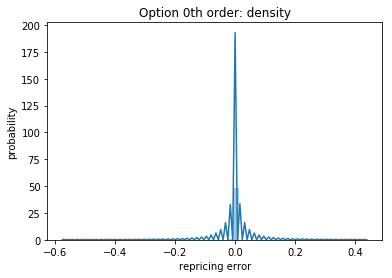

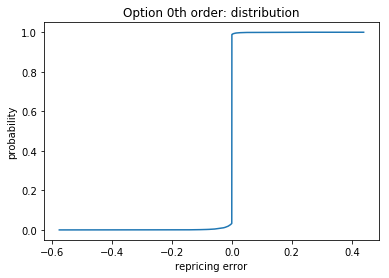

In [12]:
displayerror(Y_ordre1_Option,"Option 0th order")

In [7]:
S1 = 100.0
S2 = 100.0
S3 = 110.0
mu1 = -0.01
mu2 = -0.01
mu3 = 0.01
v1=0.3
v2=0.25
v3=0.2
c12=0.85
c13=0.95
c23=0.85
Bonus = 1.2
YetiBarrier = 110
YetiCoupon = 2
PhoenixBarrier = 90.0
PhoenixCoupon = 1.25
PDIBarrier = 60.0
PDIGearing = -2.0
PDIStrike = 40.0
PDIType = -1.0
maturity = 5.0
NbDate = 16
computeAll(S1,S2,S3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier, PhoenixCoupon, PDIBarrier, PDIGearing,
           PDIStrike, PDIType,maturity,NbDate,learnedModels)

[['s1',
  's2',
  's3',
  'mu1',
  'mu2',
  'mu3',
  'v1',
  'v2',
  'v3',
  'c12',
  'c13',
  'c23',
  'Bonus',
  'YetiBarrier',
  'YetiCoupon',
  'PhoenixBarrier',
  'PhoenixCoupon',
  'PDIBarrier',
  'PDIGearing',
  'PDIStrike',
  'PDIType',
  'T',
  'NbDate'],
 ['100.0000',
  '100.0000',
  '110.0000',
  '-0.0100',
  '-0.0100',
  '0.0100',
  '0.3000',
  '0.2500',
  '0.2000',
  '0.8500',
  '0.9500',
  '0.8500',
  '1.2000',
  '110.0000',
  '2.0000',
  '90.0000',
  '1.2500',
  '60.0000',
  '-2.0000',
  '40.0000',
  '-1.0000',
  '5.0000',
  '16.0000'],
 ['prediction Boost 0', 'recomputed'],
 ['11.4928', '11.4809']]

In [11]:
S1 = 100.0
S2 = 100.0
S3 = 110.0
mu1 = -0.01
mu2 = -0.01
mu3 = 0.01
v1=0.3
v2=0.25
v3=0.2
c12=0.85
c13=0.95
c23=0.85
Bonus = 1.2
YetiBarrier = 110
YetiCoupon = 2
PhoenixBarrier = 90.0
PhoenixCoupon = 1.25
PDIBarrier = 60.0
PDIGearing = -2.0
PDIStrike = 40.0
PDIType = -1.0
maturity = 5.0
NbDate = 16
computeAll_new(S1,S2,S3,mu1,mu2,mu3,v1,v2,v3,c12,c13,c23,Bonus,YetiBarrier,YetiCoupon,PhoenixBarrier, PhoenixCoupon, PDIBarrier, PDIGearing,
           PDIStrike, PDIType,maturity,NbDate,model_enhanced,DataScalerX,DataScalerY,y_scaler_Option)

[['s1',
  's2',
  's3',
  'mu1',
  'mu2',
  'mu3',
  'v1',
  'v2',
  'v3',
  'c12',
  'c13',
  'c23',
  'Bonus',
  'YetiBarrier',
  'YetiCoupon',
  'PhoenixBarrier',
  'PhoenixCoupon',
  'PDIBarrier',
  'PDIGearing',
  'PDIStrike',
  'PDIType',
  'T',
  'NbDate'],
 ['100.0000',
  '100.0000',
  '110.0000',
  '-0.0100',
  '-0.0100',
  '0.0100',
  '0.3000',
  '0.2500',
  '0.2000',
  '0.8500',
  '0.9500',
  '0.8500',
  '1.2000',
  '110.0000',
  '2.0000',
  '90.0000',
  '1.2500',
  '60.0000',
  '-2.0000',
  '40.0000',
  '-1.0000',
  '5.0000',
  '16.0000'],
 ['prediction Boost 0', 'recomputed'],
 ['11.4928', '11.5540']]

In [7]:
icase = 0
schowcase_new(icase,dataset,params.INPUT_GOAL,model_enhanced,DataScalerX,DataScalerY,y_scaler_Option)

[['s1',
  's2',
  's3',
  'mu1',
  'mu2',
  'mu3',
  'v1',
  'v2',
  'v3',
  'c12',
  'c13',
  'c23',
  'Bonus',
  'YetiBarrier',
  'YetiCoupon',
  'PhoenixBarrier',
  'PhoenixCoupon',
  'PDIBarrier',
  'PDIGearing',
  'PDIStrike',
  'PDIType',
  'maturity',
  'NbDate'],
 ['71.0630',
  '70.7741',
  '133.3036',
  '0.0074',
  '0.0343',
  '0.0049',
  '0.1558',
  '0.2052',
  '0.2748',
  '0.5566',
  '0.7757',
  '0.4006',
  '-0.8657',
  '102.5289',
  '1.2075',
  '93.1270',
  '0.6298',
  '62.2820',
  '1.9065',
  '59.7044',
  '0.2062',
  '4.2224',
  '7.0000'],
 ['prediction boost 0',
  'call recomputed',
  'callStored recomputed',
  'normcall stored',
  'normCall b0'],
 ['3.6917', '3.7234', '3.7110', '0.4613', '0.4612']]

In [8]:
icase = 1
schowcase_new(icase,dataset,params.INPUT_GOAL,model_enhanced,DataScalerX,DataScalerY,y_scaler_Option)

[['s1',
  's2',
  's3',
  'mu1',
  'mu2',
  'mu3',
  'v1',
  'v2',
  'v3',
  'c12',
  'c13',
  'c23',
  'Bonus',
  'YetiBarrier',
  'YetiCoupon',
  'PhoenixBarrier',
  'PhoenixCoupon',
  'PDIBarrier',
  'PDIGearing',
  'PDIStrike',
  'PDIType',
  'maturity',
  'NbDate'],
 ['88.1507',
  '149.9020',
  '80.0983',
  '0.0127',
  '0.0360',
  '0.0141',
  '0.1557',
  '0.2365',
  '0.1741',
  '0.9725',
  '0.5585',
  '0.6729',
  '0.5111',
  '90.9161',
  '1.7220',
  '94.8031',
  '1.9234',
  '49.3157',
  '-2.2648',
  '59.1578',
  '0.7268',
  '2.6570',
  '18.0000'],
 ['prediction boost 0',
  'call recomputed',
  'callStored recomputed',
  'normcall stored',
  'normCall b0'],
 ['33.3081', '31.5445', '33.2141', '0.5758', '0.5762']]

In [9]:
icase = 2
schowcase_new(icase,dataset,params.INPUT_GOAL,model_enhanced,DataScalerX,DataScalerY,y_scaler_Option)

[['s1',
  's2',
  's3',
  'mu1',
  'mu2',
  'mu3',
  'v1',
  'v2',
  'v3',
  'c12',
  'c13',
  'c23',
  'Bonus',
  'YetiBarrier',
  'YetiCoupon',
  'PhoenixBarrier',
  'PhoenixCoupon',
  'PDIBarrier',
  'PDIGearing',
  'PDIStrike',
  'PDIType',
  'maturity',
  'NbDate'],
 ['104.2553',
  '130.8283',
  '78.1401',
  '0.0176',
  '0.0031',
  '0.0031',
  '0.2124',
  '0.1908',
  '0.2807',
  '0.5936',
  '0.6117',
  '0.5129',
  '1.8734',
  '105.4551',
  '1.5803',
  '90.8232',
  '1.0165',
  '41.4065',
  '2.7413',
  '67.4019',
  '0.5879',
  '4.3468',
  '6.0000'],
 ['prediction boost 0',
  'call recomputed',
  'callStored recomputed',
  'normcall stored',
  'normCall b0'],
 ['14.6193', '14.6296', '14.5904', '0.5035', '0.5036']]

In [13]:
testlen=int(Y_ordre1_Option.size) 
x_distrib =numpy.arange(testlen)/testlen
y_distrib1=sorted(Y_ordre1_Option)
inter1_Option=scipy.interpolate.interp1d(x_distrib,y_distrib1)

In [23]:
pll=[0.001,0.01,0.02,0.03,0.04]
table = ListTable()
table.append(['probability level','lower bound', 'higher bound'])
for p in pll:
    table.append(["%.3f" % p,"%.5f" % inter1_Option([p])[0],"%.5f" % inter1_Option([1-p])[0]])
print("Network Error Distribution ")
table

Network Error Distribution 


probability level,lower bound,higher bound
0.001,-0.11816,0.05467
0.010,-0.02981,0.00179
0.020,-0.01091,0.00000
0.030,-0.00144,0.00000
0.040,0.00000,0.00000
